In [1]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run -i Untitled.ipynb

In [3]:
# set path to data file
path = '/home/louism/Thesis/data/COMPAS_Output_16/COMPAS_Output.h5'

### Get the standard sdBs

In [4]:
ce_masses1, ce_interaction_masses1, ce_periods1, stable_masses1, stable_interaction_masses1, stable_periods1 = getPrimarySDBsProperties(path)
ce_masses2, ce_interaction_masses2, ce_periods2, stable_masses2, stable_interaction_masses2, stable_periods2 = getSecondarySDBsProperties(path)

### Get the ignited HeWDs

In [5]:
preWD_ce_mass1, WD_ce_mass1, WD_ce_met1, preWD_stable_mass1, WD_stable_mass1, WD_stable_met1 = getPrimaryWDMassMet(path)
preWD_ce_mass2, WD_ce_mass2, WD_ce_met2, preWD_stable_mass2, WD_stable_mass2, WD_stable_met2 = getSecondaryWDMassMet(path)

In [6]:
wd_ignition_cemask1 = maskIgnitesOrNot(preWD_ce_mass1, WD_ce_mass1, WD_ce_met1)
wd_ignition_cemask2 = maskIgnitesOrNot(preWD_ce_mass2, WD_ce_mass2, WD_ce_met2)

wd_ignition_stablemask1 = maskIgnitesOrNot(preWD_stable_mass1, WD_stable_mass1, WD_stable_met1)
wd_ignition_stablemask2 = maskIgnitesOrNot(preWD_stable_mass2, WD_stable_mass2, WD_stable_met2)

In [7]:
ce_wd_zams_masses31, ce_wd_masses31, ce_wd_periods31, stable_wd_zams_masses31, stable_wd_masses31, stable_wd_periods31, \
ce_wd_zams_masses51, ce_wd_masses51, ce_wd_periods51, stable_wd_zams_masses51, stable_wd_masses51, stable_wd_periods51 = \
getPrimaryIgnitedWDProperties(path)

In [8]:
ce_wd_zams_masses32, ce_wd_masses32, ce_wd_periods32, stable_wd_zams_masses32, stable_wd_masses32, stable_wd_periods32, \
ce_wd_zams_masses52, ce_wd_masses52, ce_wd_periods52, stable_wd_zams_masses52, stable_wd_masses52, stable_wd_periods52 = \
getSecondaryIgnitedWDProperties(path)

In [9]:
no_wd_primary_masses = [ce_masses1, stable_masses1]
no_wd_primaries_label=['Common Envelope', 'Stable RLOF']

within_three_wd_primary_masses = [ce_masses1, stable_masses1, ce_wd_masses31, stable_wd_masses31]
within_five_wd_primary_masses = [ce_masses1, stable_masses1, ce_wd_masses51, stable_wd_masses51]
within_percent_primaries_label=['Common Envelope', 'Stable RLOF', 'CE WD', 'Stable RLOF WD']

In [10]:
no_wd_secondary_masses = [ce_masses2, stable_masses2]
no_wd_secondaries_label=['Common Envelope', 'Stable RLOF']

within_three_wd_secondary_masses = [ce_masses2, stable_masses2, ce_wd_masses32, stable_wd_masses32]
within_five_wd_secondary_masses = [ce_masses2, stable_masses2, ce_wd_masses52, stable_wd_masses52]
within_percent_secondaries_label=['Common Envelope', 'Stable RLOF', 'CE WD', 'Stable RLOF WD']

In [11]:
no_wd_primary_periods = [ce_periods1, stable_periods1]
no_wd_primaries_label=['Common Envelope', 'Stable RLOF']

within_three_wd_primary_periods = [ce_periods1, stable_periods1, ce_wd_periods31, stable_wd_periods31]
within_five_wd_primary_periods = [ce_periods1, stable_periods1, ce_wd_periods51, stable_wd_periods51]
within_percent_primaries_label=['Common Envelope', 'Stable RLOF', 'CE WD', 'Stable RLOF WD']

In [12]:
no_wd_secondary_periods = [ce_periods2, stable_periods2]
no_wd_secondaries_label=['Common Envelope', 'Stable RLOF']

within_three_wd_secondary_periods = [ce_periods2, stable_periods2, ce_wd_periods32, stable_wd_periods32]
within_five_wd_secondary_periods = [ce_periods2, stable_periods2, ce_wd_periods52, stable_wd_periods52]
within_percent_secondaries_label=['Common Envelope', 'Stable RLOF', 'CE WD', 'Stable RLOF WD']

In [13]:
sdb_mass_bins = np.linspace(0.2, 0.8, 20)
sdb_period_bins = np.linspace(-3,5,100)

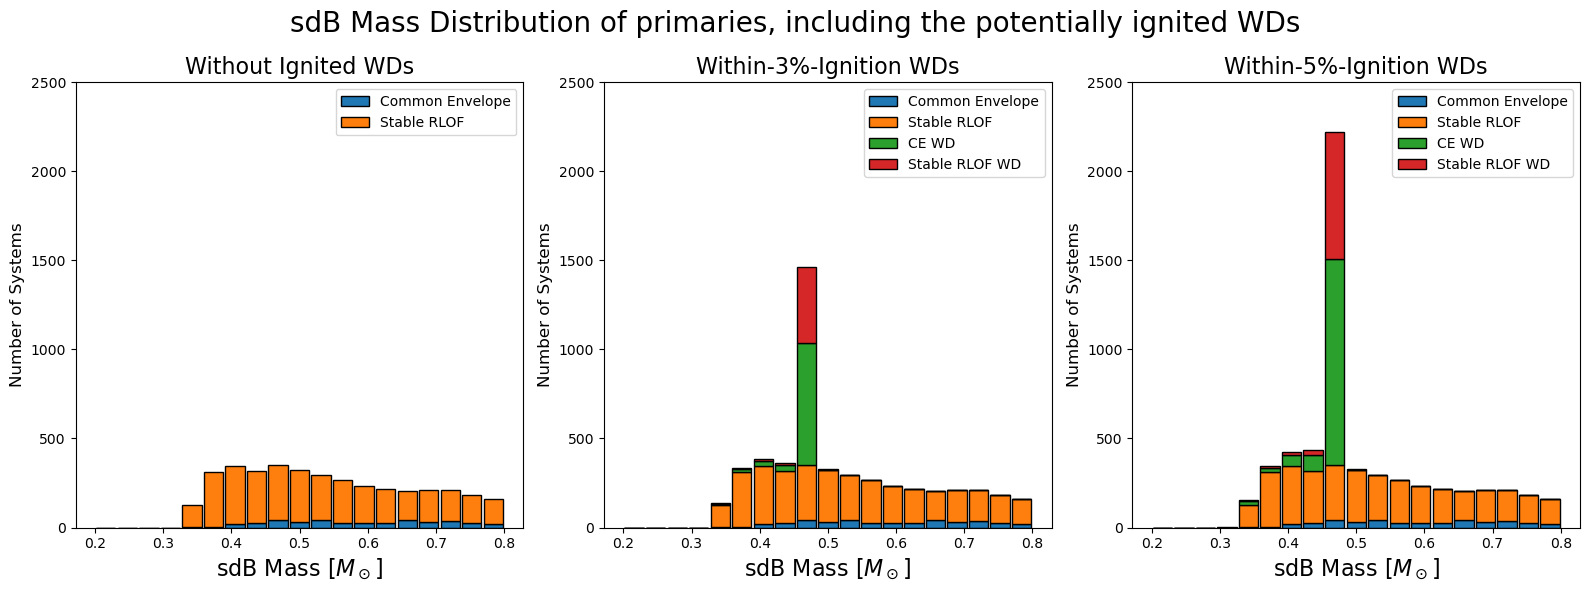

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,6))

ax=axes[0]
ax.hist(no_wd_primary_masses, bins=sdb_mass_bins, label=no_wd_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[1]
ax.hist(within_three_wd_primary_masses, bins=sdb_mass_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[2]
ax.hist(within_five_wd_primary_masses, bins=sdb_mass_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

plt.suptitle(r'sdB Mass Distribution of primaries, including the potentially ignited WDs', fontsize=20)  

plt.tight_layout()
plt.show()

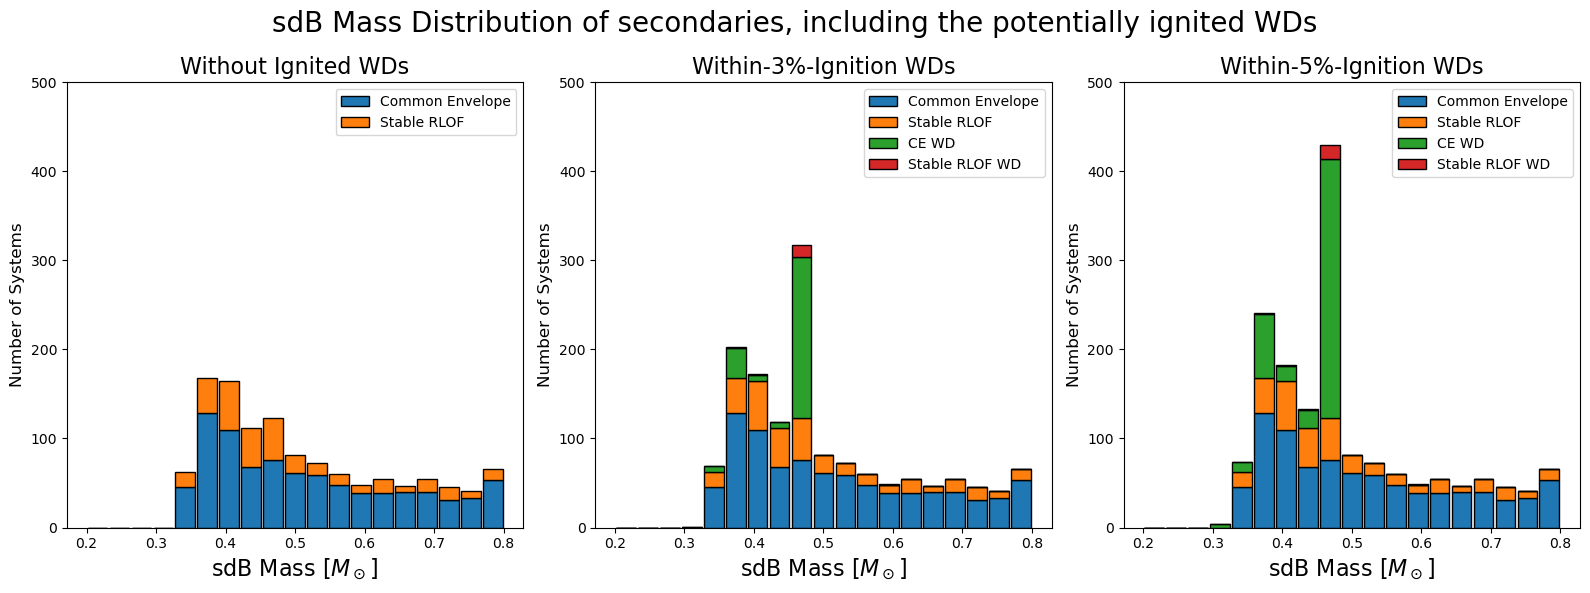

In [15]:
fig, axes = plt.subplots(1,3, figsize=(16,6))

ax=axes[0]
ax.hist(no_wd_secondary_masses, bins=sdb_mass_bins, label=no_wd_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[1]
ax.hist(within_three_wd_secondary_masses, bins=sdb_mass_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[2]
ax.hist(within_five_wd_secondary_masses, bins=sdb_mass_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

plt.suptitle(r'sdB Mass Distribution of secondaries, including the potentially ignited WDs', fontsize=20)  

plt.tight_layout()
plt.show()

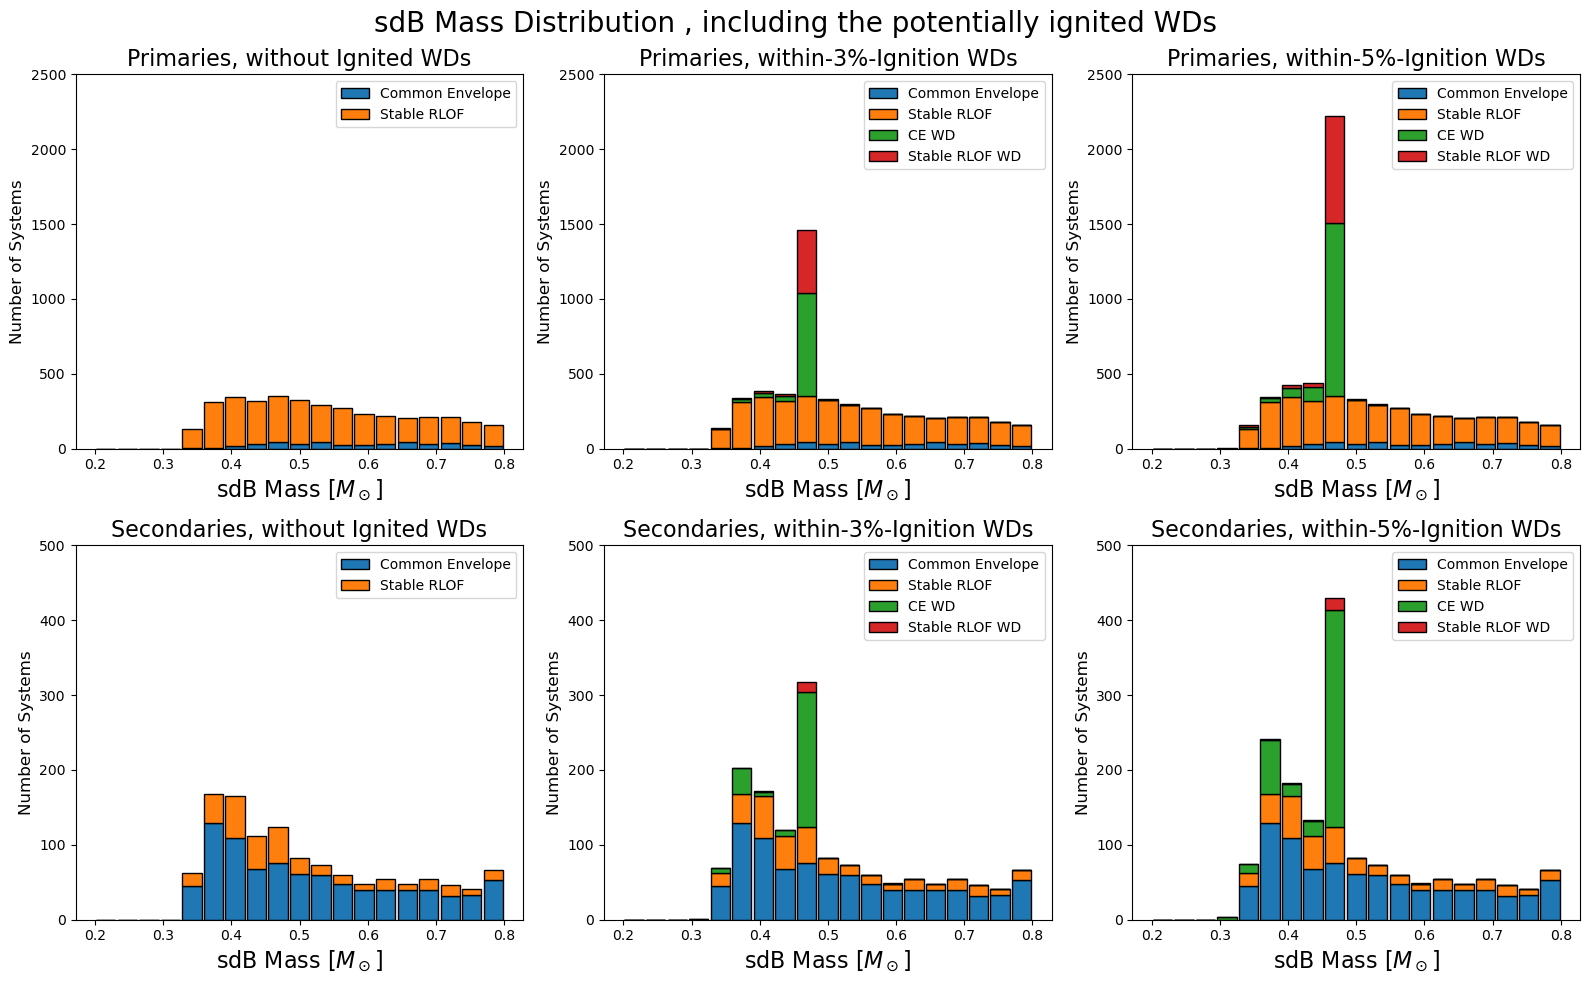

In [16]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

ax=axes[0][0]
ax.hist(no_wd_primary_masses, bins=sdb_mass_bins, label=no_wd_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Primaries, without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[0][1]
ax.hist(within_three_wd_primary_masses, bins=sdb_mass_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Primaries, within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[0][2]
ax.hist(within_five_wd_primary_masses, bins=sdb_mass_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,2500)
ax.set_title('Primaries, within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()


ax=axes[1][0]
ax.hist(no_wd_secondary_masses, bins=sdb_mass_bins, label=no_wd_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Secondaries, without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[1][1]
ax.hist(within_three_wd_secondary_masses, bins=sdb_mass_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Secondaries, within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

ax=axes[1][2]
ax.hist(within_five_wd_secondary_masses, bins=sdb_mass_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Secondaries, within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'sdB Mass [$M_\odot$]', fontsize=16)
ax.legend()

plt.suptitle(r'sdB Mass Distribution , including the potentially ignited WDs', fontsize=20)  

plt.tight_layout()
plt.show()

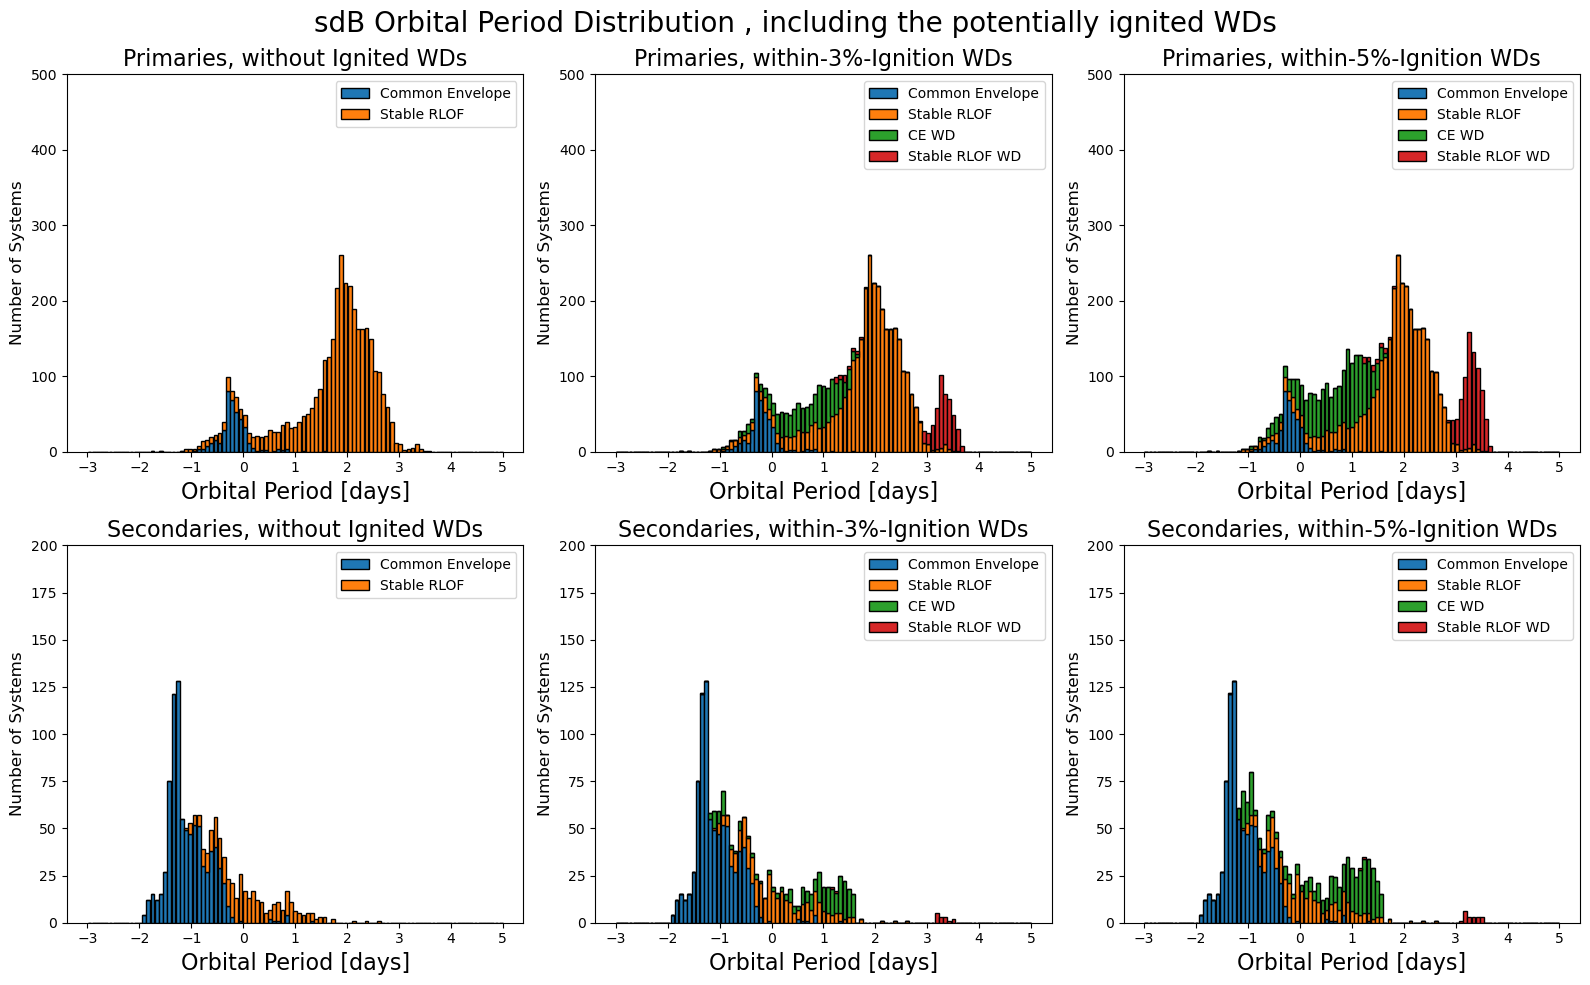

In [17]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

ax=axes[0][0]
ax.hist(no_wd_primary_periods, bins=sdb_period_bins, label=no_wd_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Primaries, without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()

ax=axes[0][1]
ax.hist(within_three_wd_primary_periods, bins=sdb_period_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Primaries, within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()

ax=axes[0][2]
ax.hist(within_five_wd_primary_periods, bins=sdb_period_bins, label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,500)
ax.set_title('Primaries, within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()


ax=axes[1][0]
ax.hist(no_wd_secondary_periods, bins=sdb_period_bins, label=no_wd_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,200)
ax.set_title('Secondaries, without Ignited WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()

ax=axes[1][1]
ax.hist(within_three_wd_secondary_periods, bins=sdb_period_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,200)
ax.set_title('Secondaries, within-3%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()

ax=axes[1][2]
ax.hist(within_five_wd_secondary_periods, bins=sdb_period_bins, label=within_percent_secondaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.set_ylim(0,200)
ax.set_title('Secondaries, within-5%-Ignition WDs', fontsize=16)
ax.set_ylabel('Number of Systems', fontsize=12)
ax.set_xlabel(r'Orbital Period [days]', fontsize=16)
ax.legend()

plt.suptitle(r'sdB Orbital Period Distribution , including the potentially ignited WDs', fontsize=20)  

plt.tight_layout()
plt.show()

### Get all pre-interaction masses and sdB masses 

In [18]:
all_interaction_masses = np.concatenate((ce_interaction_masses1, stable_interaction_masses1, ce_wd_zams_masses51, stable_wd_zams_masses51, \
                                        ce_interaction_masses2, stable_interaction_masses2, ce_wd_zams_masses52, stable_wd_zams_masses52))

all_sdB_masses = np.concatenate((ce_masses1, stable_masses1, ce_wd_masses51, stable_wd_masses51, \
                                ce_masses2, stable_masses2, ce_wd_masses52, stable_wd_masses52))

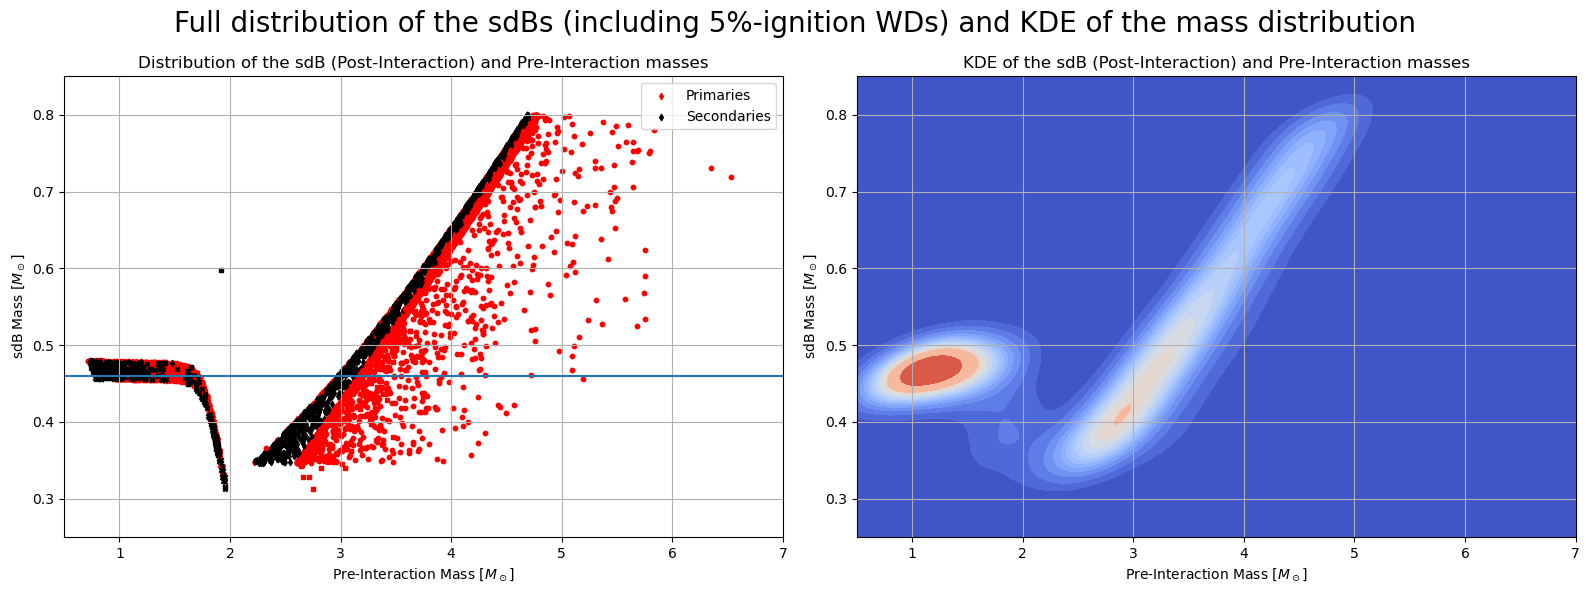

In [24]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

ax=axes[0]

ax.scatter(ce_interaction_masses1, ce_masses1, color='red', marker='d', s=10, label='Primaries')
ax.scatter(stable_interaction_masses1, stable_masses1, color='red', marker='o', s=10)
ax.scatter(ce_wd_zams_masses51, ce_wd_masses51, color='red', marker='x', s=10)
ax.scatter(stable_wd_zams_masses51, stable_wd_masses51, color='red', marker='s', s=10)
ax.hlines(0.46,0.5,7)
ax.scatter(ce_interaction_masses2, ce_masses2, color='black', marker='d', s=10, label='Secondaries')
ax.scatter(stable_interaction_masses2, stable_masses2, color='red', marker='o', s=10)
ax.scatter(ce_wd_zams_masses52, ce_wd_masses52, color='black', marker='x', s=10)
ax.scatter(stable_wd_zams_masses52, stable_wd_masses52, color='black', marker='s', s=10)

ax.set_xlabel(r'Pre-Interaction Mass [$M_\odot$]')
ax.grid()
ax.legend()
ax.set_ylabel(r'sdB Mass [$M_\odot$]')
ax.set_title('Distribution of the sdB (Post-Interaction) and Pre-Interaction masses')

ax.set_xlim(0.5, 7)
ax.set_ylim(0.25, 0.85)

ax=axes[1]
sns.kdeplot(x=all_interaction_masses, y=all_sdB_masses, cmap="coolwarm", fill=True, levels=15, thresh=0)
ax.set_xlabel(r'Pre-Interaction Mass [$M_\odot$]')
ax.grid()
ax.set_ylabel(r'sdB Mass [$M_\odot$]')
ax.set_title('KDE of the sdB (Post-Interaction) and Pre-Interaction masses')

ax.set_xlim(0.5, 7)
ax.set_ylim(0.25, 0.85)

plt.suptitle('Full distribution of the sdBs (including 5%-ignition WDs) and KDE of the mass distribution', fontsize=20)

plt.tight_layout()
plt.show()

### Time-weighted mass histogram

In [20]:
all_sdB_times = getTimeStripped(all_sdB_masses)

ce_time1 = getTimeStripped(ce_masses1)
stable_time1=getTimeStripped(stable_masses1)
ce_time2 = getTimeStripped(ce_masses2)
stable_time2=getTimeStripped(stable_masses2)
ce_wd_time1 = getTimeStripped(ce_wd_masses51)
stable_wd_time1 = getTimeStripped(stable_wd_masses51)
ce_wd_time2 = getTimeStripped(ce_wd_masses52)
stable_wd_time2 = getTimeStripped(stable_wd_masses52)

all_sdB_times1 = [ce_time1, stable_time1, ce_wd_time1, stable_wd_time1]
all_sdB_times2 = [ce_time2, stable_time2, ce_wd_time2, stable_wd_time2]

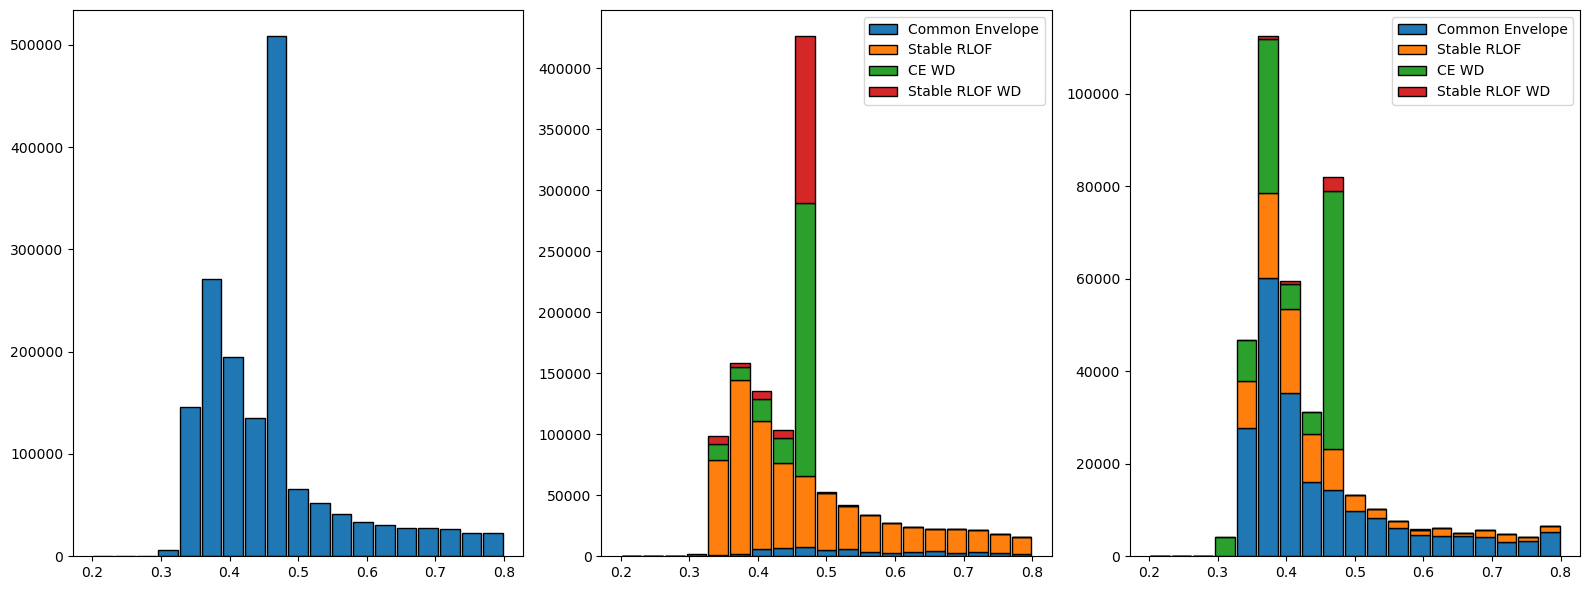

In [21]:
fig, axes = plt.subplots(1,3, figsize=(16,6))

ax=axes[0]
ax.hist(all_sdB_masses, bins=sdb_mass_bins, weights=all_sdB_times, \
        rwidth=0.9, edgecolor='black')

ax=axes[1]
ax.hist(within_five_wd_primary_masses, bins=sdb_mass_bins, weights=all_sdB_times1, \
        label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.legend()

ax=axes[2]
ax.hist(within_five_wd_secondary_masses, bins=sdb_mass_bins, weights=all_sdB_times2, \
        label=within_percent_primaries_label, stacked=True, rwidth=0.9, edgecolor='black')
ax.legend()

plt.tight_layout()
plt.show()